In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import pandas as pd
import torch as tn

The variable *path* indicates the directory where the simulation output data are stored.

In [ ]:
path = 'Simulation directory'

The function *normalized mass difference* derives the normalized mass difference *$\frac{\Delta M}{M} = \frac{(M_{dyn}-M)}{M}$* (1-D array) from the observed and the intrinsic velocity dispersion (*$\sigma$* and *$\sigma_0$*, respectively) at varying binary fraction.

In [50]:
def normalized_mass_difference(R, M, sigma, sigma_0):
    
    delta_M_norm = (sigma**2-sigma_0**2)/(sigma_0**2)
    
    return delta_M_norm

The function *read output data* reads the velocity dispersion output data as a function of *$a_{max}$*, *$a_{min}$* and *R*, and computes the associated normalized mass difference. Thus, it returns:

1) *$\sigma_{a_{max}}$ tensor* : 5$\times$8$\times$9 tensor containing the velocity dispersion output data as a function of *$a_{max}$* and at varying binary fraction *$f_b$*;

2) *$\sigma_{a_{min}}$ tensor* : 10$\times$8$\times$9 tensor containing the velocity dispersion output data as a function of *$a_{min}$* and at varying binary fraction *$f_b$*;

3) *$\sigma_R$ tensor* : 10$\times$10$\times$10 tensor containing the velocity dispersion output data as a function of *R* and at varying binary fraction *$f_b$*;

4) *$\bigr(\frac{\Delta M}{M}\bigl)_{a_{max}}$ tensor* : 5$\times$2$\times$9 tensor containing the normalized mass difference from the velocity dispersion output data as a function of *$a_{max}$* and at varying binary fraction *$f_b$*;

5) *$\bigr(\frac{\Delta M}{M}\bigl)_{a_{min}}$ tensor* : 10$\times$2$\times$9 tensor containing the normalized mass difference from the velocity dispersion output data as a function of *$a_{min}$* and at varying binary fraction *$f_b$*.

In [ ]:
def read_output_data(R, M_tot, path):
    
    # a_max
    
    f_b = [0,5,10,15,20,25,30,35,40]
    
    sigma_a_max_tensor = tn.zeros(5,8,9)
    k = 0
    for a_max in [50,100,200,300,400]:
        i = 0
        for number in f_b:
            j = 0
            with open('path/a_max_%i/sigma_%i'%(a_max, int(number)), "r") as file:
                for line in file:
                    sigma_a_max_tensor[k,j,i]=[float(x) for x in line.split()][0]
                    j +=1
            i += 1
        k += 1
    
    delta_M_a_max_tensor = tn.zeros(5,2,9)
    for i in range(9):
        delta_M_a_max_tensor[:,0,i] = dynamical_mass(R, M, sigma_a_max_tensor[:,0,i], sigma_a_max_tensor[:,1,i])
        delta_M_a_max_tensor[:,1,i] = dynamical_mass(R, M, sigma_a_max_tensor[:,3,i], sigma_a_max_tensor[:,1,i])
        i+=1
     
    
    # a_min
    
    f_b = [0,5,10,15,20,25,30,35,40]
    
    sigma_a_min_tensor = tn.zeros(10,8,9)
    k = 0
    for a_min in [0.01,0.02,0.03,0.05,0.08,0.1,0.2,0.4,0.6,1]:
        i = 0
        for number in f_b:
            j = 0
            with open("path/a_min_%.2f/sigma_%i"%(a_min, int(number)), "r") as file:
                for line in file:
                    sigma_a_min_tensor[k,j,i]=[float(x) for x in line.split()][0]
                    j +=1
            i += 1
        k += 1
        
    delta_M_a_min_tensor = tn.zeros(10,2,9)
    for i in range(9):
        delta_M_a_min_tensor[:,0,i] = dynamical_mass(R, M, sigma_a_min_tensor[:,0,i], sigma_a_min_tensor[:,1,i])
        delta_M_a_min_tensor[:,1,i] = dynamical_mass(R, M, sigma_a_min_tensor[:,3,i], sigma_a_min_tensor[:,1,i])
        i+=1
        
    
    # R
    
    f_b = [0,1,2,3,4,5,10,15,20,25,30,35,40]
    
    sigma_R_tensor = tn.zeros(10,10,13)
    k = 0
    for R in [25,50,75,100,125,150,175,200,225,250]:
        i = 0
        for number in f_b:
            j = 0
            with open('path/R_%i/sigma_%i'%(R, int(number)), "r") as file:
                for line in file:
                    sigma_R_tensor[k,j,i]=[float(x) for x in line.split()][0]
                    j +=1
            i += 1
        k += 1
        
    return sigma_a_max_tensor, sigma_a_min_tensor, sigma_R_tensor, delta_M_a_max_tensor, delta_M_a_min_tensor

The function *$\sigma$ analysis* reads the velocity dispersion data relative to a single simulation, chosen by inserted the desired *$a_{value}$*, and compares the trend of *$\sigma_{tot}$* and *$\sigma_{tot,lum}$* as a function of the binary function *$f_b$*. Specifically, it returns:

1) *$\sigma_{sb}$* : intrinsic velocity dispersion in km/s (1-D array);

2) *$\sigma_{tot}$* : observed velocity dispersion in km/s (1-D array);

3) *$\sigma_{tot,lum}$* : luminosity averaged observed velocity dispersion in km/s (1-D array).

For instance, if *$a_{value}=a_{100}$*, then the velocity dispersion of the reference model is analyzed.

In [ ]:
def sigma_analysis(path, plot=True):
    
    # Data reading
    
    f_b = [0,5,10,15,20,25,30,35,40]
    
    sigma_matrix = np.zeros(shape=(8,9))
    i = 0
    for number in f_b:
        j = 0
        with open('path/a_value/sigma_%i"%int(number), 'r') as file:
        for line in file:
            sigma_matrix[j,i]=[float(x) for x in line.split()][0]
            j +=1
    i += 1 
                  
    sigma_tot = sigma_matrix[0,:]
    sigma_sb = sigma_matrix[1,:]
    sigma_s = sigma_matrix[2,:]
    sigma_tot_lum = sigma_matrix[3,:]
    sigma_s_lum = sigma_matrix[4,:]
    sigma_b = sigma_matrix[5,:]
    var_tot = sigma_matrix[6,:]
    var_tot_lum = sigma_matrix[7,:]
                  
    # plot

    f_b = np.array([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4])
                  
    plt.figure(figsize=(6,8), dpi=120)
    plt.plot(f_b, sigma_tot, markersize=7, mfc='white', mec='black', color='black', marker='o', label='$\sigma_{tot}$')
    plt.plot(f_b, sigma_tot_lum, markersize=7, mfc='white', mec='black', color='black', marker='o', label='$\sigma_{tot,lum}$')
    plt.xlabel('$f_b$', fontsize=25)
    plt.ylabel('$\sigma$ [km/s]', fontsize=25)
    plt.legend(fontsize=17)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.show()
                  
    return sigma_sb, sigma_tot, sigma_tot_lum

The function *$a_{max}$ figure* displays the trend of *$\sigma_{tot}$*, *$\sigma_{tot,lum}$* and the related normalized mass differences as a function of *$a_{max}$*. Each curve refers to a specific binary fraction *$f_b$*, which increases going bottom-up.

In [ ]:
def a_max_figure(sigma_a_max_tensor, delta_M_a_max_tensor, plot=True):
    
    a_max = [50,100,200,300,400]
    
    fig = plt.figure(figsize=(15,19), dpi=120)
    
    fig.add_subplot(2,2,1)
    styles = ["-", ":", "--", "-."]
    for i in range(9):
        X = a_max
        Y = sigma_a_max_tensor[:,0,i]
        plt.plot(X, Y, marker='o', markersize=5, mfc='white', mec='black', color='black', linestyle=styles[i%len(styles)], linewidth=2, alpha=1)
    plt.xlabel('$a_{max}$ [AU]', fontsize=20)
    plt.ylabel('$\sigma_{tot}$ [km $s^{-1}$]', fontsize=20)
    plt.xticks(X, fontsize=16)
    plt.yticks(fontsize=16)
    plt.title('a)', fontsize=20)

    fig.add_subplot(2,2,2)
    styles = ["-", ":", "--", "-."]
    for i in range(9):
        X = a_max
        Y = sigma_a_max_tensor[:,3,i]
        plt.plot(X, Y, marker='o', markersize=5, mfc='white', mec='black', color='black', linestyle=styles[i%len(styles)], linewidth=2, alpha=1)
    plt.xlabel('$a_{max}$ [AU]', fontsize=20)
    plt.ylabel('$\sigma_{tot,lum}$ [km $s^{-1}$]', fontsize=20)
    plt.xticks(X, fontsize=16)
    plt.yticks(fontsize=16)
    plt.title('b)', fontsize=20)

    fig.add_subplot(2,2,3)
    styles = ["-", ":", "--", "-."]
    for i in range(9):
        X = a_max
        Y = delta_M_a_max_tensor[:,0,i]
        plt.plot(X, Y, marker='o', markersize=5, mfc='white', mec='black', color='black', linestyle=styles[i%len(styles)], linewidth=2, alpha=1)
    plt.xlabel('$a_{max}$ [AU]', fontsize=20)
    plt.ylabel('$\Delta$M/M', fontsize=20)
    plt.xticks(X, fontsize=16)
    plt.yticks(fontsize=16)
    plt.title('c)', fontsize=20)

    fig.add_subplot(2,2,4)
    for i in range(9):
        X = a_max
        Y = delta_M_a_max_tensor[:,1,i]
        plt.plot(X, Y, marker='o', markersize=5, mfc='white', mec='black', color='black', linestyle=styles[i%len(styles)], linewidth=2, alpha=1)
    plt.xlabel('$a_{max}$ [AU]', fontsize=20)
    plt.ylabel('$\Delta$M/M', fontsize=20)
    plt.xticks(X, fontsize=16)
    plt.yticks(fontsize=16)
    plt.title('d)', fontsize=20)

    plt.show()
    
    return 0

The function *$a_{min}$ figure* displays the trend of *$\sigma_{tot}$*, *$\sigma_{tot,lum}$* and the related normalized mass differences as a function of *$a_{min}$*. Each curve refers to a specific binary fraction *$f_b$*, which increases going bottom-up.

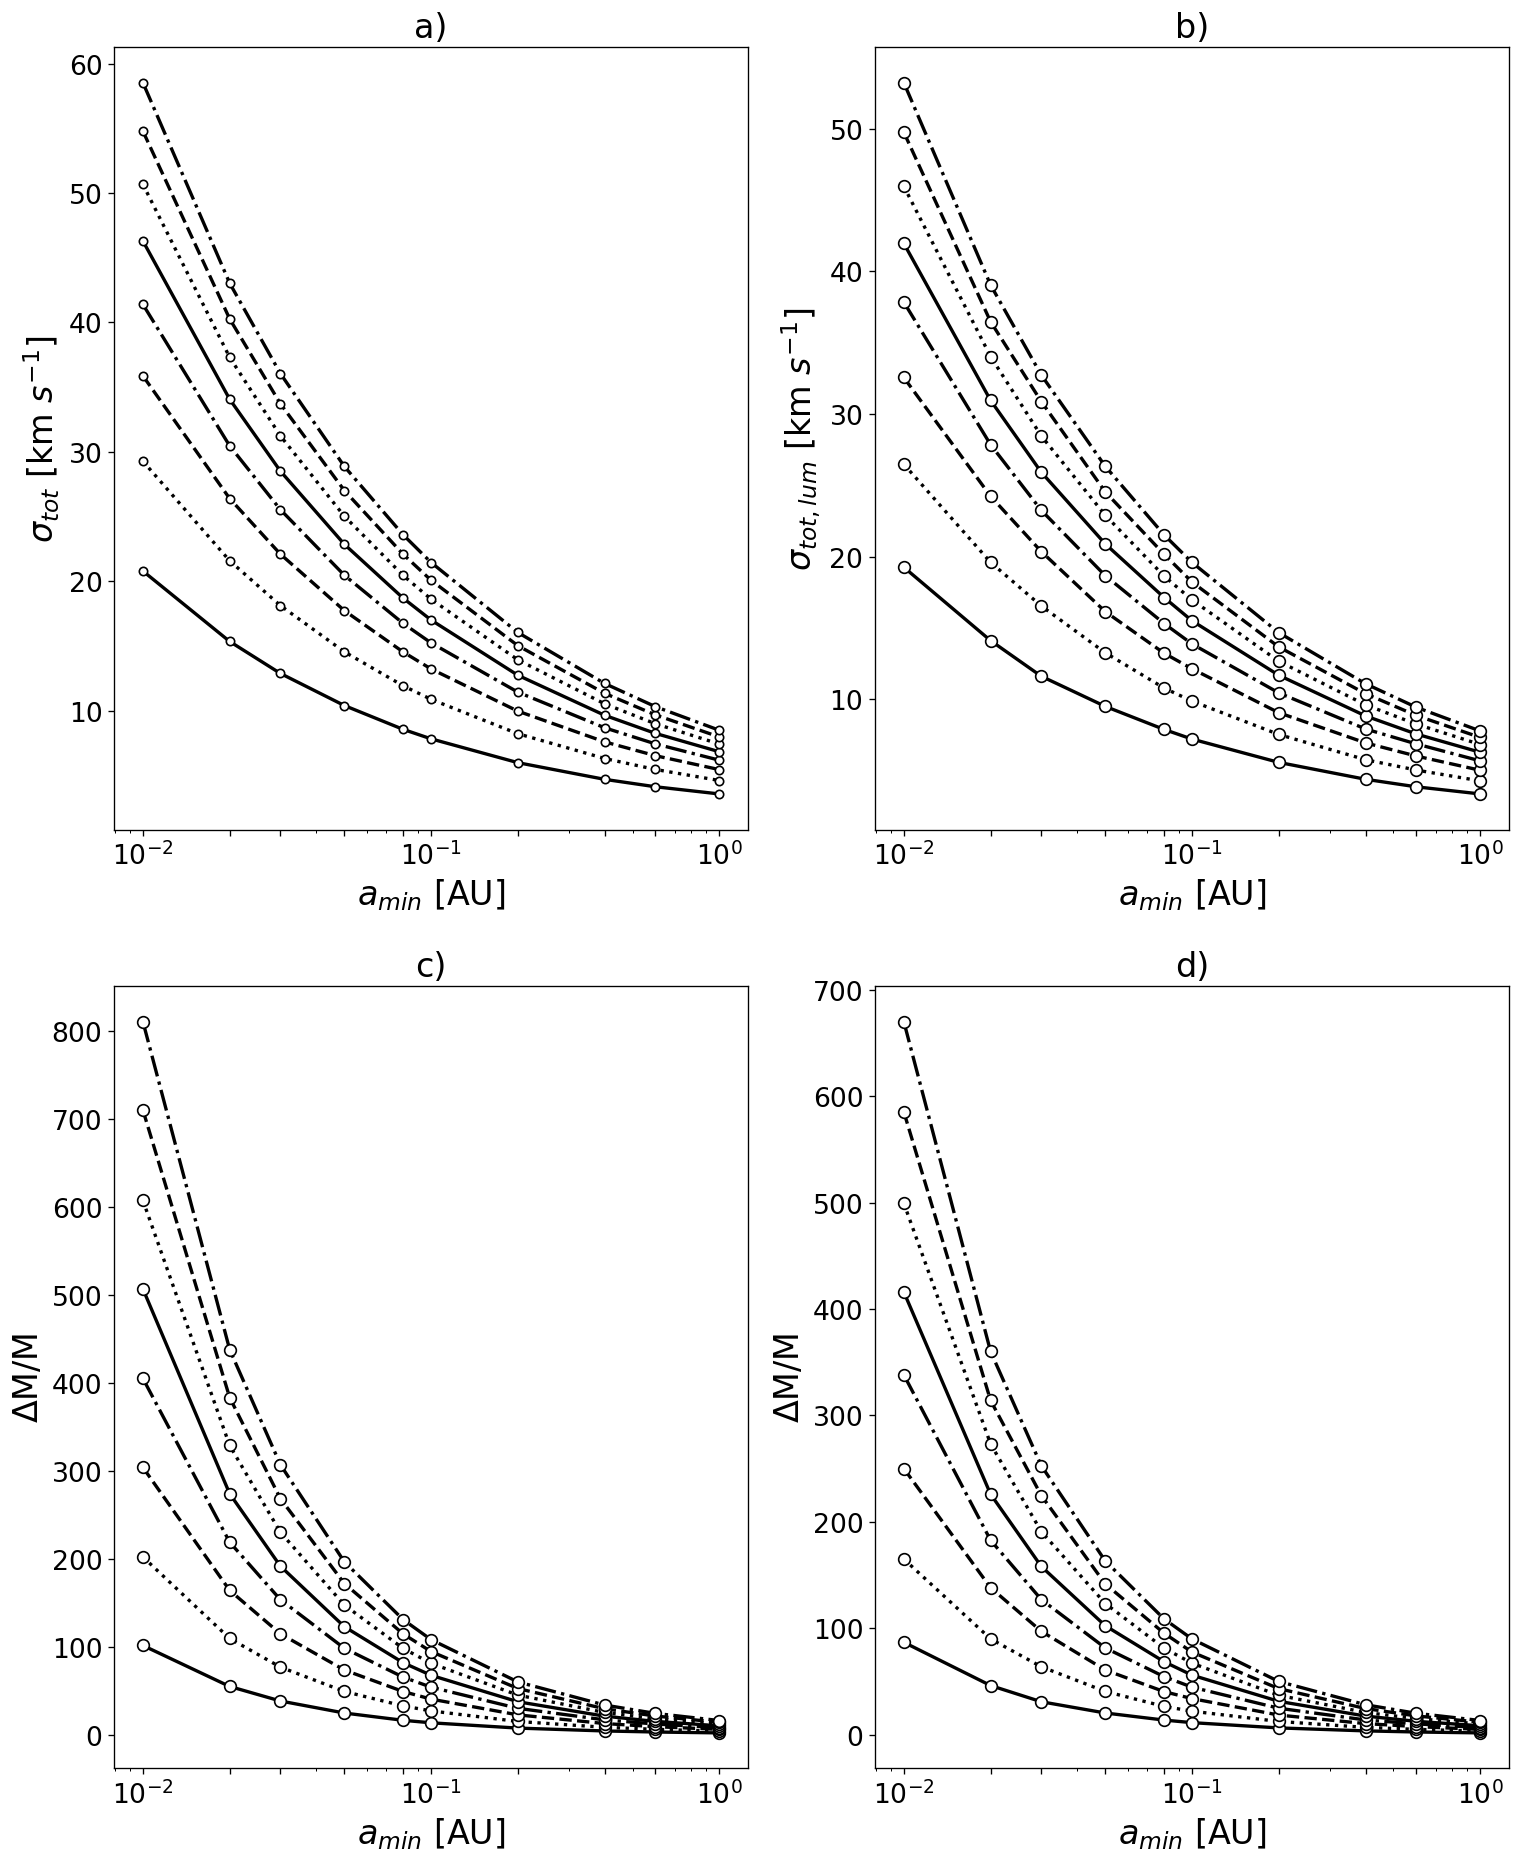

In [48]:
def a_min_figure(sigma_a_min_tensor, delta_M_a_min_tensor, plot=True):
    
    a_min = [0.01,0.02,0.03,0.05,0.08,0.1,0.2,0.4,0.6,1]

    fig = plt.figure(figsize=(15,19), dpi=120)

    fig.add_subplot(2,2,1)
    for i in range(9):
        X = a_min
        Y = sigma_a_min_tensor[:,0,i]
        plt.plot(X, Y, marker='o', markersize=5, mfc='white', mec='black', color='black', linestyle=styles[i%len(styles)], linewidth=2, alpha=1)
    plt.xscale('log')
    plt.xlabel('$a_{min}$ [AU]', fontsize=20)
    plt.ylabel('$\sigma_{tot}$ [km $s^{-1}$]', fontsize=20)
    plt.xticks(X, fontsize=16)
    plt.yticks(fontsize=16)
    plt.title('a)', fontsize=20)

    fig.add_subplot(2,2,2)
    for i in range(9):
        X = a_min
        Y = sigma_a_min_tensor[:,3,i]
        plt.plot(X, Y, marker='o', markersize=5, mfc='white', mec='black', color='black', linestyle=styles[i%len(styles)], linewidth=2, alpha=1)
    plt.xscale('log')
    plt.xlabel('$a_{min}$ [AU]', fontsize=20)
    plt.ylabel('$\sigma_{tot,lum}$ [km $s^{-1}$]', fontsize=20)
    plt.xticks(X, fontsize=16)
    plt.yticks(fontsize=16)
    plt.title('b)', fontsize=20)

    fig.add_subplot(2,2,3)
    styles = ["-", ":", "--", "-."]
    for i in range(9):
        X = a_min
        Y = delta_M_a_min_tensor[:,0,i]
        plt.plot(X, Y, marker='o', markersize=5, mfc='white', mec='black', color='black', linestyle=styles[i%len(styles)], linewidth=2, alpha=1)
    plt.xscale('log')
    plt.xlabel('$a_{min}$ [AU]', fontsize=20)
    plt.ylabel('$\Delta$M/M', fontsize=20)
    plt.xticks(X, fontsize=16)
    plt.yticks(fontsize=16)
    plt.title('c)', fontsize=20)

    fig.add_subplot(2,2,4)
    styles = ["-", ":", "--", "-."]
    for i in range(9):
        X = a_min
        Y = delta_M_a_min_tensor[:,1,i]
        plt.plot(X, Y, marker='o', markersize=5, mfc='white', mec='black', color='black', linestyle=styles[i%len(styles)], linewidth=2, alpha=1)
    plt.xscale('log')
    plt.xlabel('$a_{min}$ [AU]', fontsize=20)
    plt.ylabel('$\Delta$M/M', fontsize=20)
    plt.xticks(X, fontsize=16)
    plt.yticks(fontsize=16)
    plt.title('d)', fontsize=20)

    plt.show()
    
    return 0

The function *$\sigma$ ratio figure* shows the dependence of the ratio *$\frac{\sigma_{tot}}{\sigma_0}$* on the system's mass density *$\rho$*, obtained by extending the radius *R* at fixed total mass *M*. Each curve refers to a specific binary fraction *$f_b$*, which increases going bottom-up.

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([1.8876, 2.4521, 2.8964, 3.3336, 3.6867, 4.0137, 4.2459, 4.5694, 4.8112,
        5.1132])
tensor([2.4606, 3.3083, 4.0025, 4.5676, 5.0744, 5.5406, 6.0462, 6.3473, 6.8203,
        7.1525])
tensor([2.8983, 3.9916, 4.8301, 5.5162, 6.1214, 6.6907, 7.3044, 7.8025, 8.2175,
        8.7022])
tensor([ 3.3126,  4.5599,  5.4952,  6.4269,  7.1256,  7.7929,  8.3831,  9.0021,
         9.5433, 10.1054])
tensor([ 3.6658,  5.0837,  6.1819,  7.0833,  7.9774,  8.7273,  9.4355,  9.9992,
        10.6211, 11.2019])
tensor([ 5.1142,  7.1161,  8.7039, 10.0699, 11.2022, 12.2632, 13.2866, 14.1162,
        14.9895, 15.8123])
tensor([ 6.1807,  8.7274, 10.6668, 12.2423, 13.7495, 15.0552, 16.2197, 17.3404,
        18.3775, 19.3871])
tensor([ 7.1386, 10.0384, 12.3018, 14.1364, 15.8253, 17.3300, 18.6795, 20.0089,
        21.2008, 22.3982])
tensor([ 7.9424, 11.2384, 13.6979, 15.7931, 17.6711, 19.3525, 20.9113, 22.3268,
        23.7121, 24.9965])
tensor([ 8.7331, 1

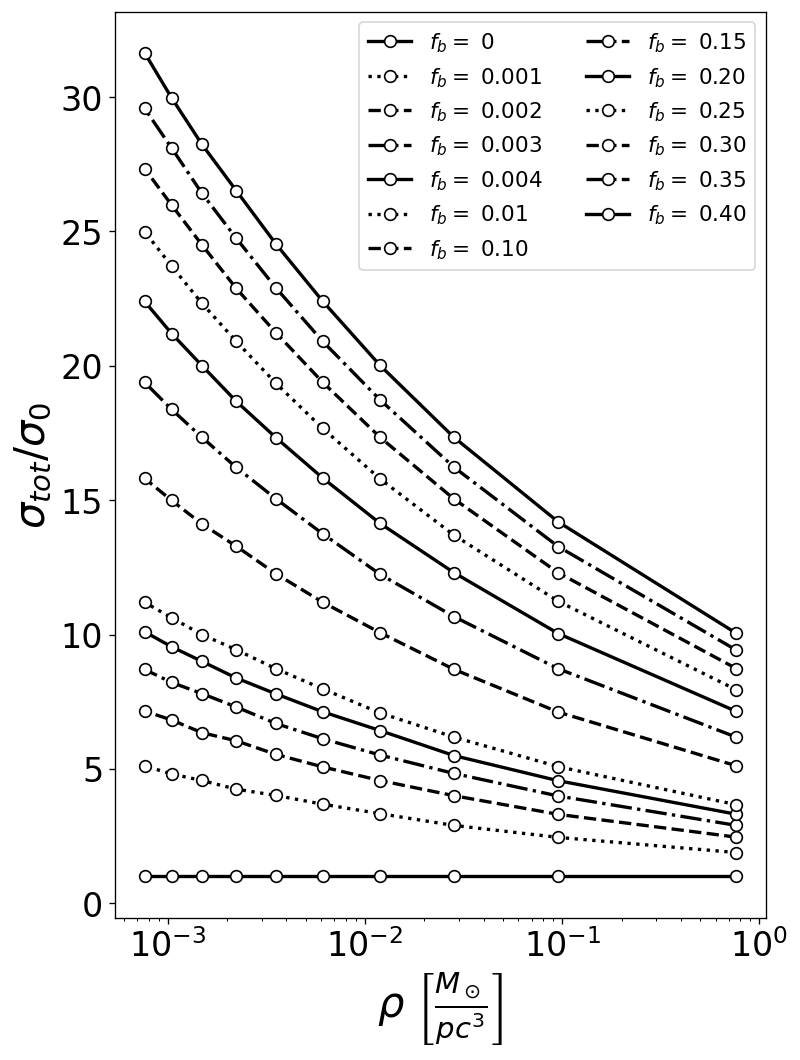

In [21]:
def sigma_ratio_figure(M, sigma_R_tensor, plot=True):
    
    f_b = np.array([0,0.001,0.002,0.003,0.004,0.005,0.10,0.15,0.20,0.25,0.30,0.35,0.40])

    R = np.array([25,50,75,100,125,150,175,200,225,250])
    rho = M/((4/3)*np.pi*R**3)

    plt.figure(figsize=(7,10), dpi=120)
    styles = ["-", ":", "--", "-."]
    for i in range(len(f_b)):
    X = rho
    Y = sigma_tot = sigma_R_tensor[:,0,i]/sigma_R_tensor[:,0,0]
    if i == 0:
        plt.plot(X, Y, marker='o', markersize=7, mfc='white', mec='black', color='black', linestyle=styles[i%len(styles)], linewidth=2, alpha=1, label='$f_b =$ %.i'%(f_b[i]))
    elif i in range(len(f_b[1:6])):
        plt.plot(X, Y, marker='o', markersize=7, mfc='white', mec='black', color='black', linestyle=styles[i%len(styles)], linewidth=2, alpha=1, label='$f_b =$ %.3f'%(f_b[i]))
    else:
        plt.plot(X, Y, marker='o', markersize=7, mfc='white', mec='black', color='black', linestyle=styles[i%len(styles)], linewidth=2, alpha=1, label='$f_b =$ %.2f'%(f_b[i]))
    plt.xscale('log')
    plt.xlabel(r'$\rho$ $\left[ \frac{M_\odot}{pc^3} \right]$', fontsize=25)
    plt.ylabel('$\sigma_{tot}/\sigma_{0}$', fontsize=25)
    plt.xticks(X, fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(ncol=2, fontsize=13)
    plt.show()
    
    return 0

Functions initialization. In particular, *R*=50 pc and *M*=5$\times$10$^4$ M$_\odot$ for the model UFD, whereas *R*=3 kpc and *M*=10$^7$ M$_\odot$ for the model dSph.

In [ ]:
sigma_a_max_tensor, sigma_a_min_tensor, sigma_R_tensor, delta_M_a_max_tensor, delta_M_a_min_tensor = read_output_data(R, M, path)

sigma_sb, sigma_tot, sigma_tot_lum = sigma_analysis(path, plot=True)

a_max_figure(sigma_a_max_tensor, delta_M_a_max_tensor, plot=True)

a_min_figure(sigma_a_min_tensor, delta_M_a_min_tensor, plot=True)

sigma_ratio_figure(M, sigma_R_tensor, plot=True)